In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def snapshot(N, name):
    f = open("../../state.dat", "r")
    x = np.zeros(N)
    y = np.zeros(N)
    Z = np.zeros((N,N))
    i = 0
    for row in f:
        if i != 0:
            a, b, c = row.split(" ")
            J = np.mod(i-1,N)
            I = int((i-1)/N)
            x[I] = float(a)
            y[J] = float(b)
            Z[I][J] = float(c)
        else:
            N, tmax, dx = row.split(" ")
            dx = float(dx)
            N = int(N)

        i = i + 1

    X,Y = np.meshgrid(x,y)
    f.close()
    fig = plt.figure(figsize = (5,5))
    fig.subplots_adjust(wspace=0.3)
    # Blues
    #plt.figure(figsize=(10,10))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)
    #plt.colorbar()
    #plt.axis([-3, 3, -3, 3])
    plt.title('t = ' + str(tmax))
    plt.axis('off')
    plt.savefig(name)

In [3]:
# Init
size = 16
dx = 0.1
N = int(size/dx)
u0 = 1

In [4]:
cmd = "cd ../..; ./.bin/datainit " + str(size) + " " + str(u0)
os.system(cmd)

New dx = 0.100000


0

0


/tmp/ipykernel_4730/994620083.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)


Reading C(t) from file. From t = 0.000000
Finish reading C(t) from file. Until t = 0.900360; tmax = 1.000000
Number time steps going to simulate = 3
1
Reading C(t) from file. From t = 0.900360
Finish reading C(t) from file. Until t = 1.800720; tmax = 2.000000
Number time steps going to simulate = 3
2
Reading C(t) from file. From t = 1.800720
Finish reading C(t) from file. Until t = 2.701080; tmax = 3.000000
Number time steps going to simulate = 3
3
Reading C(t) from file. From t = 3.001200
Finish reading C(t) from file. Until t = 3.901561; tmax = 4.000000
Number time steps going to simulate = 3
4
Reading C(t) from file. From t = 3.901561
Finish reading C(t) from file. Until t = 4.801921; tmax = 5.000000
Number time steps going to simulate = 3
5
Reading C(t) from file. From t = 4.801921
Finish reading C(t) from file. Until t = 5.702281; tmax = 6.000000
Number time steps going to simulate = 3
6
Reading C(t) from file. From t = 6.002401
Finish reading C(t) from file. Until t = 6.902761; t

KeyboardInterrupt: 

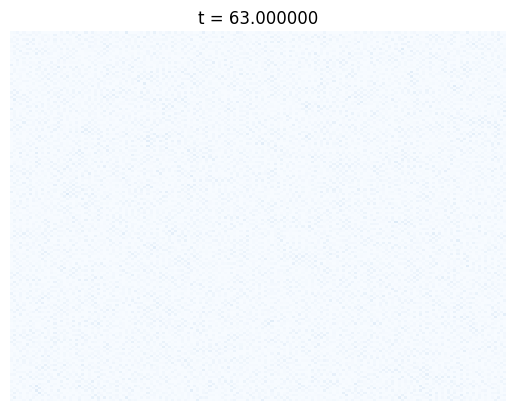

In [5]:
# Simulate
Dt = 1
tspan = 1000
numsteps = round(tspan/Dt)
cmd = "cd ../..; ./.bin/tdgl " + str(Dt) + " 'fileCin.dat'"
savedir = "snapshots/" + str(size) + "/"

# Save initial state
snapshot(N, savedir + "0.png")
for i in np.arange(0, numsteps):
    print(i)
    os.system(cmd)
    # Save
    snapshot(N, savedir + str(i+23) + ".png")